In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [3]:
sales_data=pd.read_csv("Rossmann Stores Data.csv")

In [5]:
store_data=pd.read_csv("store.csv")

In [338]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [11]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [23]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [25]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 0, 'Competition Distance Distribution Plot')

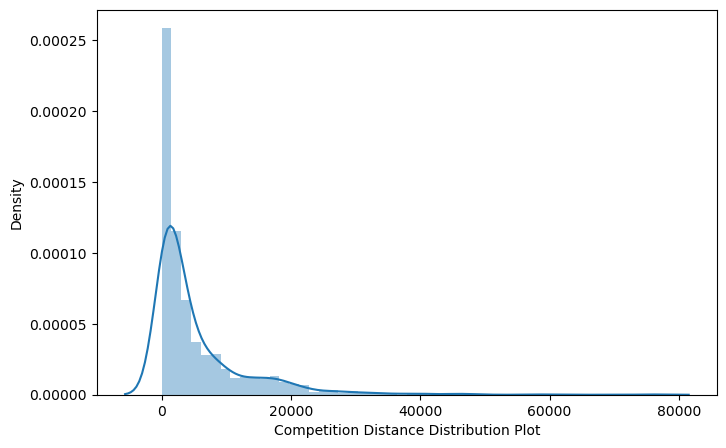

In [27]:
#distribution plot of competition distance
sns.distplot(x=store_data['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

In [29]:
# filling competition distance with the median value
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [31]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [33]:
# imputing the nan values of promo2 related columns with 0
store_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_data['Promo2SinceYear'].fillna(value=0,inplace=True)
store_data['PromoInterval'].fillna(value=0,inplace=True)

In [35]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
#merge the datasets on stores data
df = sales_data.merge(right=store_data, on="Store", how="left")

In [39]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [41]:
df.shape

(1017209, 18)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [45]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [47]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [49]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [53]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

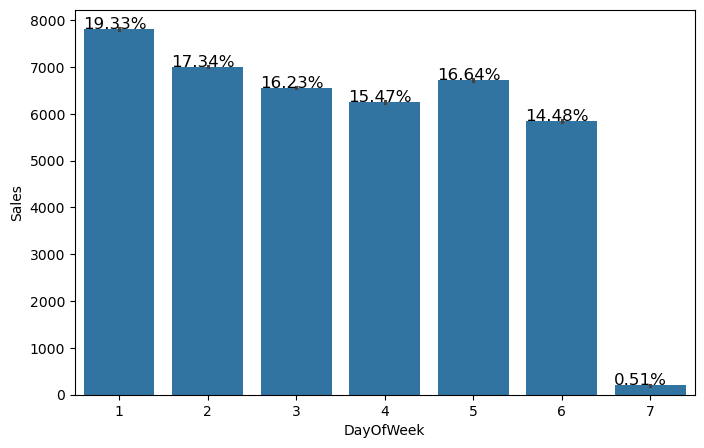

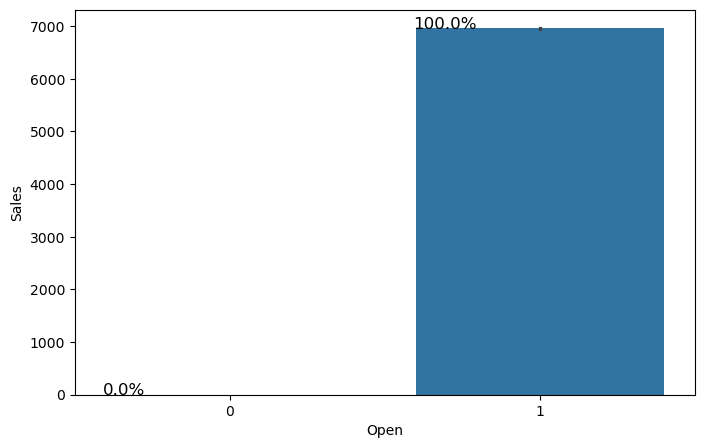

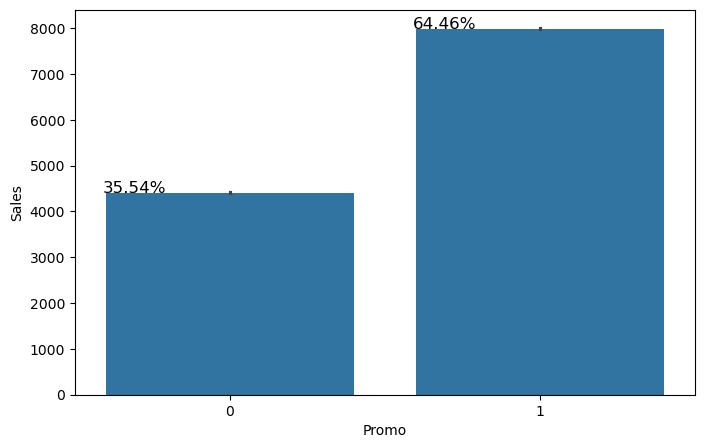

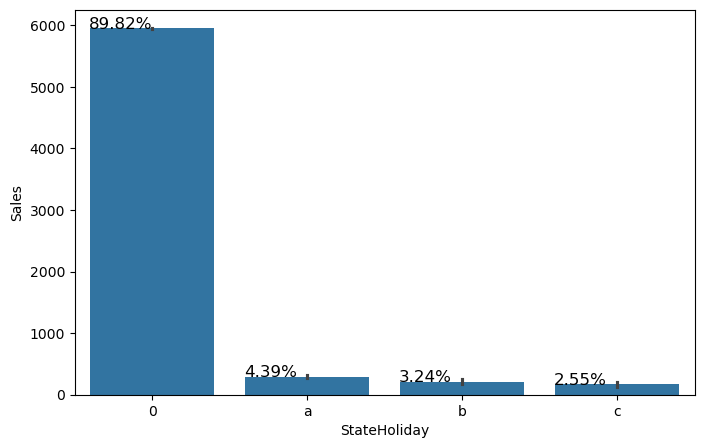

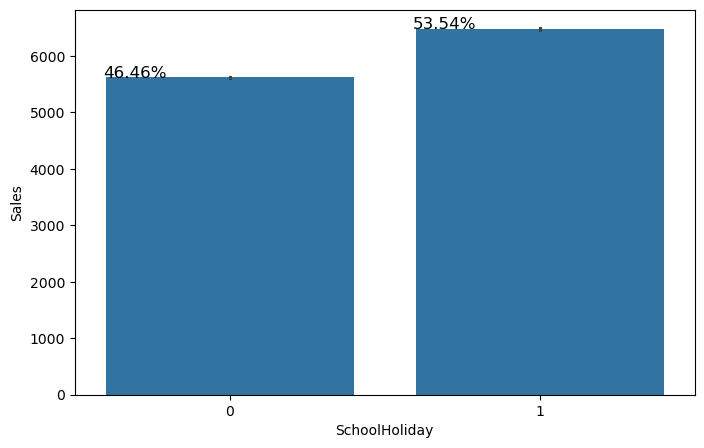

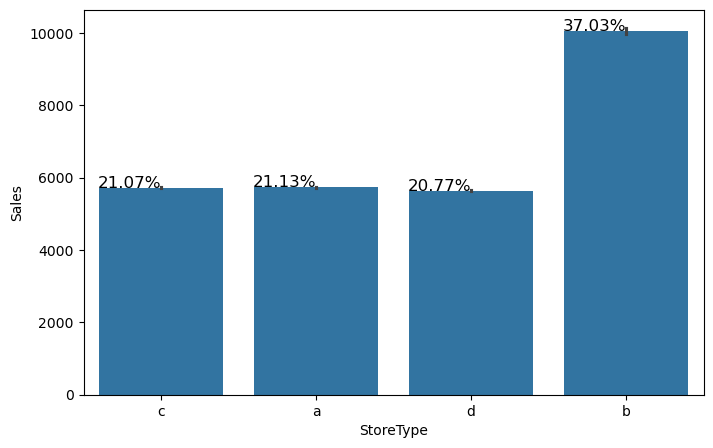

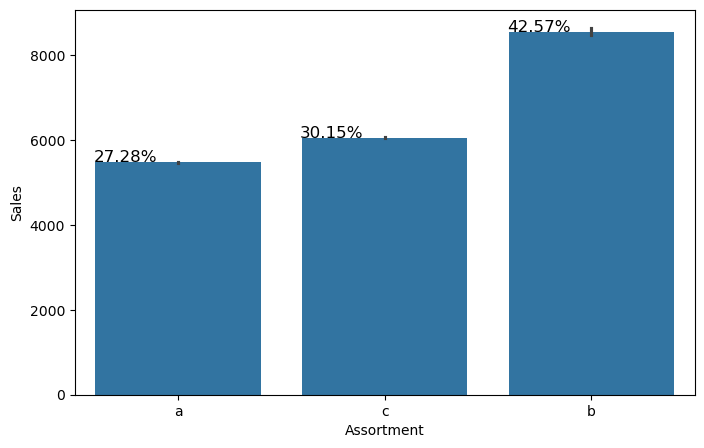

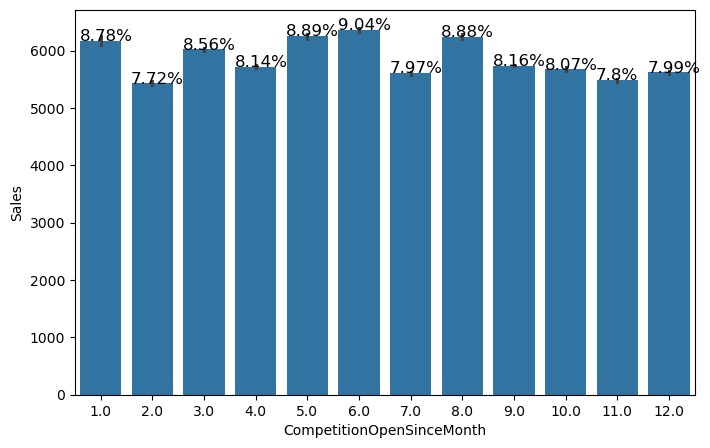

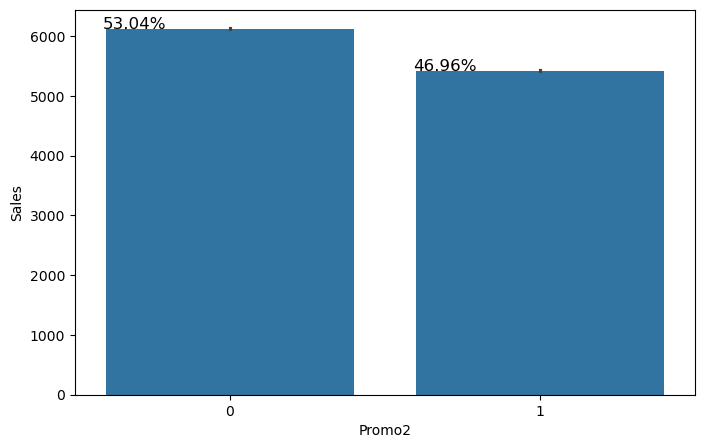

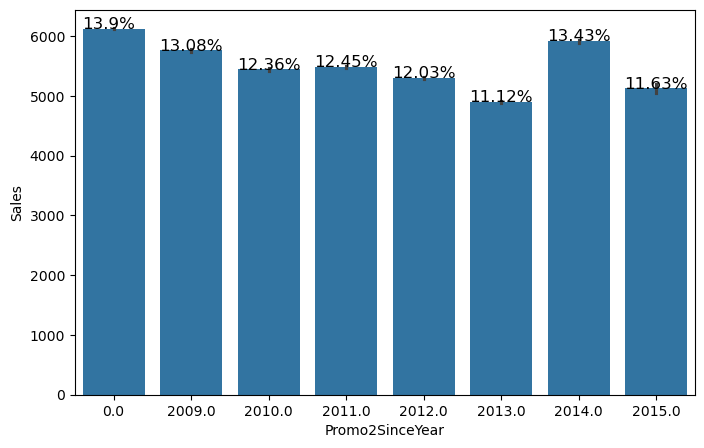

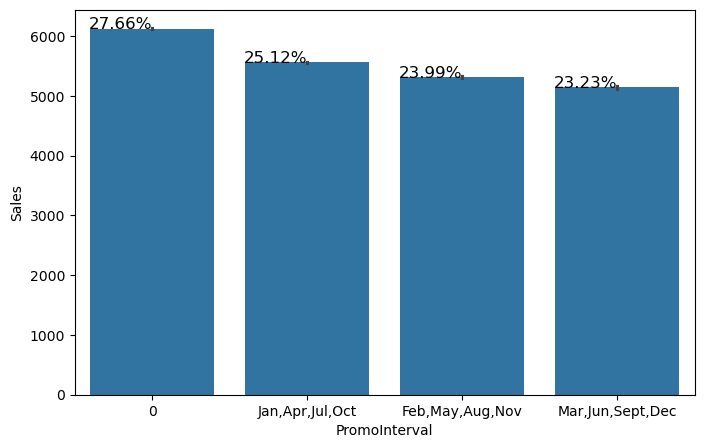

In [55]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

<Axes: xlabel='Open', ylabel='Sales'>

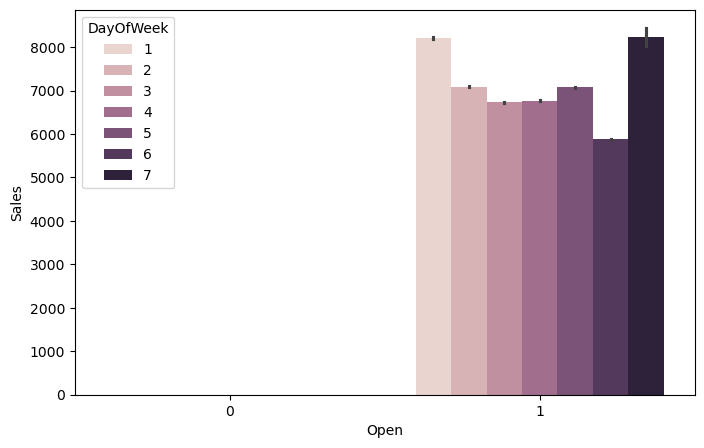

In [56]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

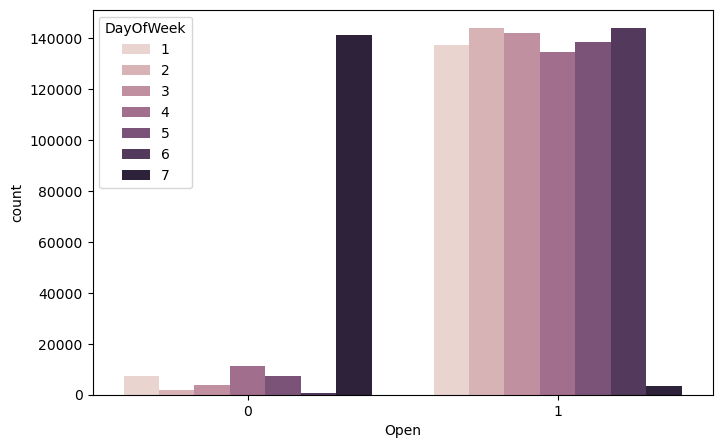

In [57]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

<Axes: xlabel='StoreType', ylabel='Sales'>

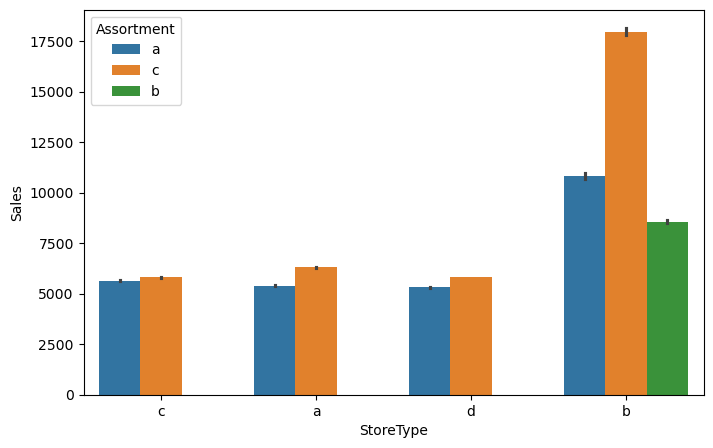

In [58]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

In [67]:
# Group by 'StoreType' and sum 'Sales' and 'Customers'
store_type = df.groupby('StoreType')[['Sales', 'Customers']].sum().reset_index()

# Sort values by 'Sales' and 'Customers' in descending order
store_type.sort_values(['Sales', 'Customers'], ascending=False, inplace=True)

print(store_type)

  StoreType       Sales  Customers
0         a  3165334859  363541434
3         d  1765392943  156904995
2         c   783221426   92129705
1         b   159231395   31465621


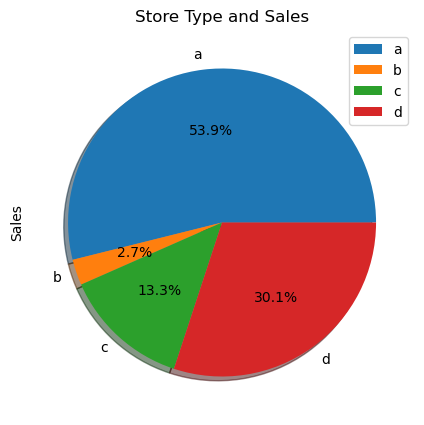

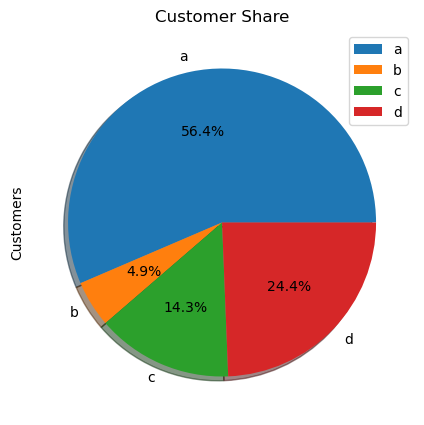

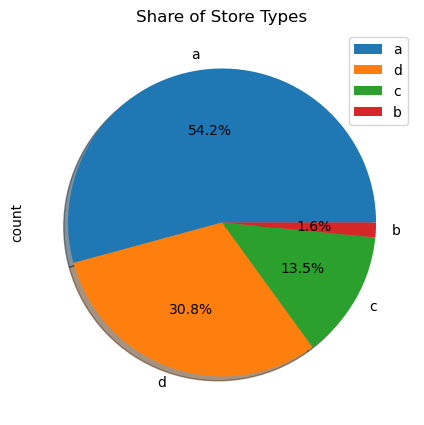

In [69]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [71]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [73]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

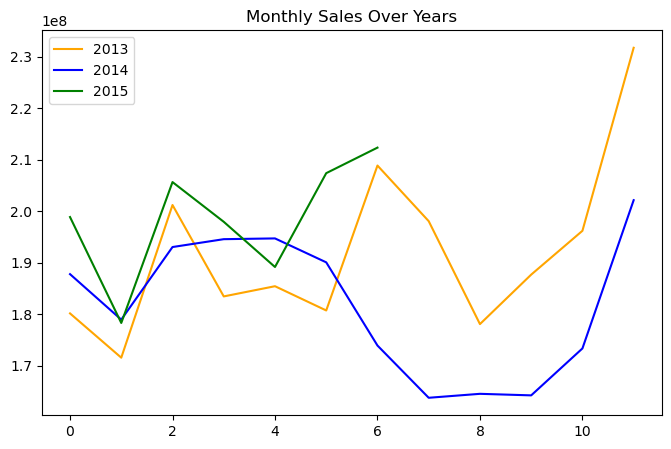

In [75]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

<Axes: xlabel='Customers', ylabel='Sales'>

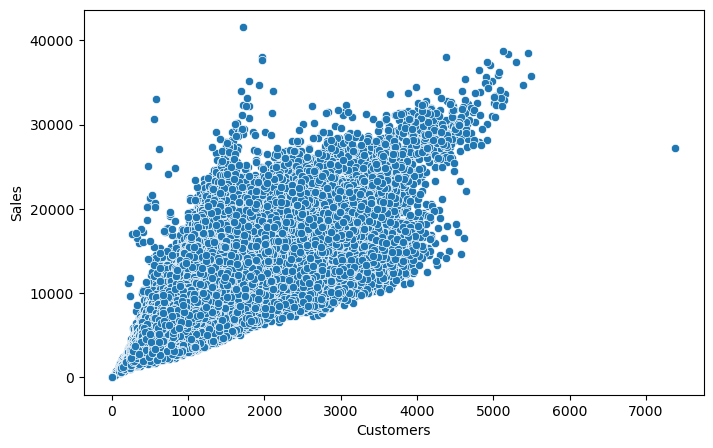

In [77]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

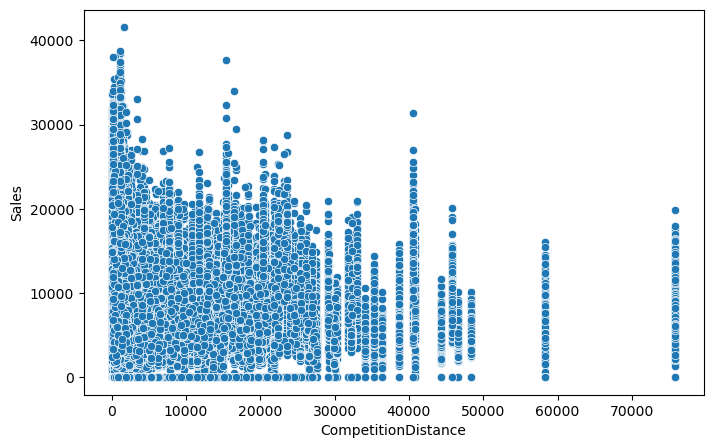

In [78]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

<Axes: ylabel='Density'>

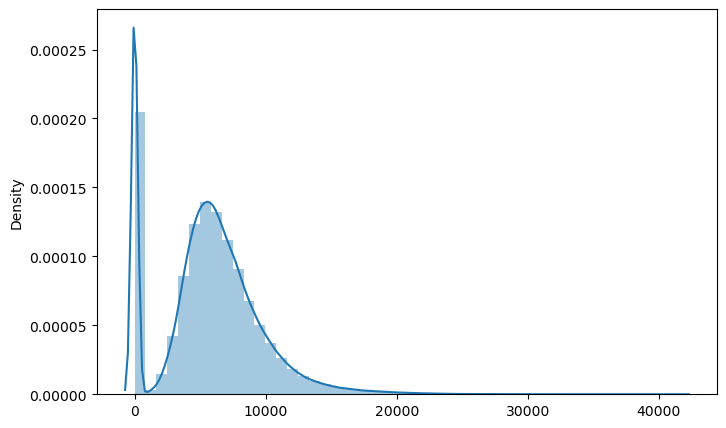

In [79]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

<Axes: ylabel='Density'>

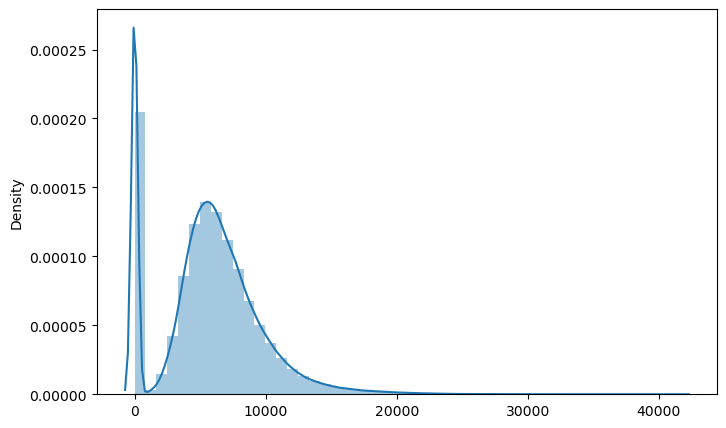

In [83]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

In [84]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

Data Types:
 DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Month                                 int32
dtype: object


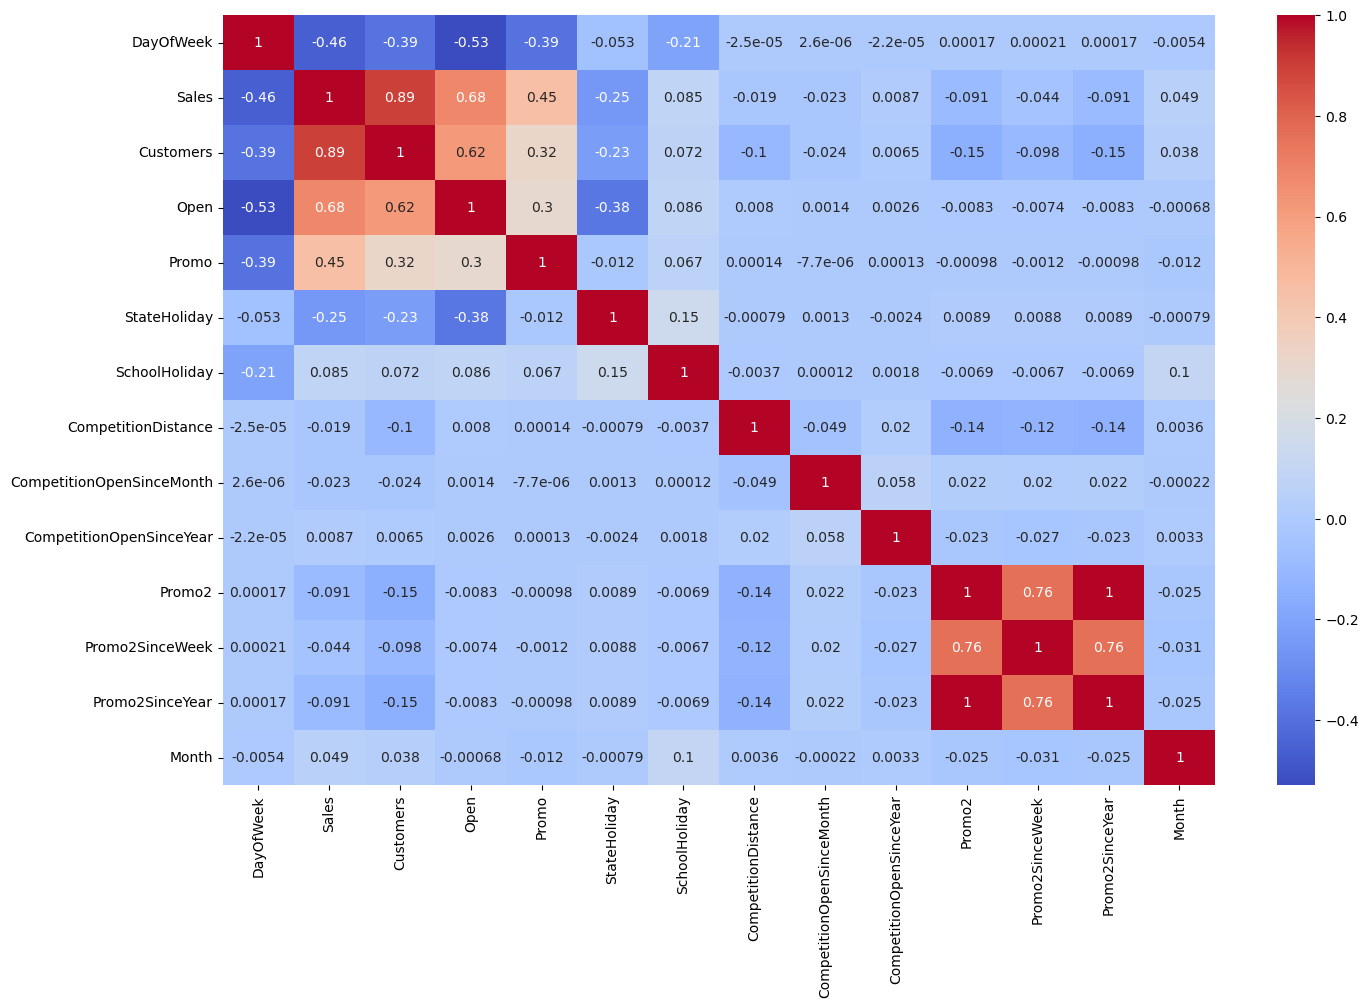

In [89]:
# Print data types to identify non-numeric columns
print("Data Types:\n", corr_df.dtypes)

# Select only numeric columns
numeric_df = corr_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

In [91]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

In [95]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [97]:
# check
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


<Axes: ylabel='Density'>

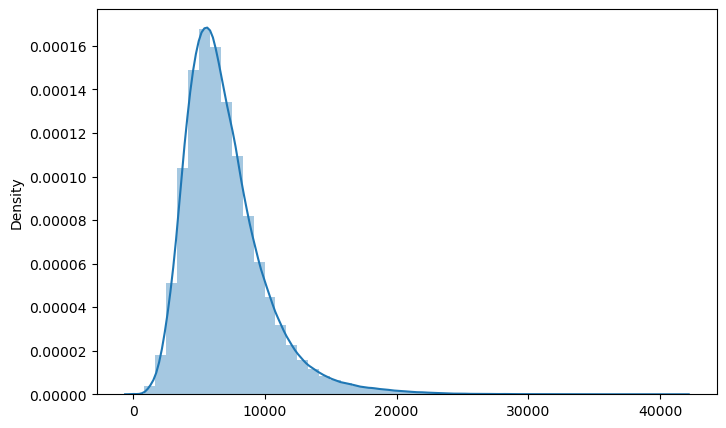

In [99]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

In [100]:
## transformation
df1['Sales'] = np.log(df1['Sales'])

In [105]:
df1.dropna(inplace=True)

In [107]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

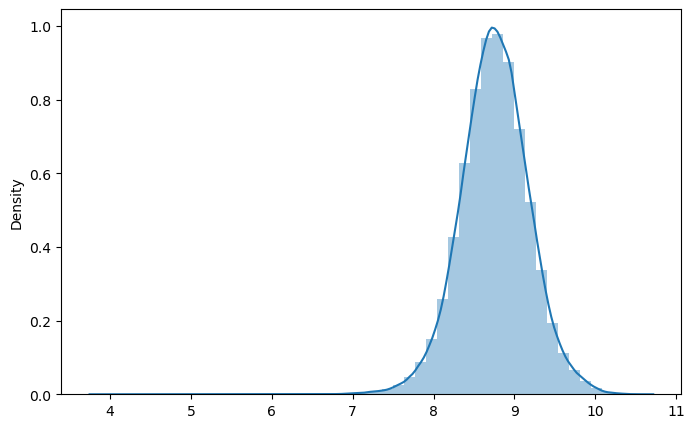

In [109]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

In [111]:
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [113]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [115]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [117]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [119]:
df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

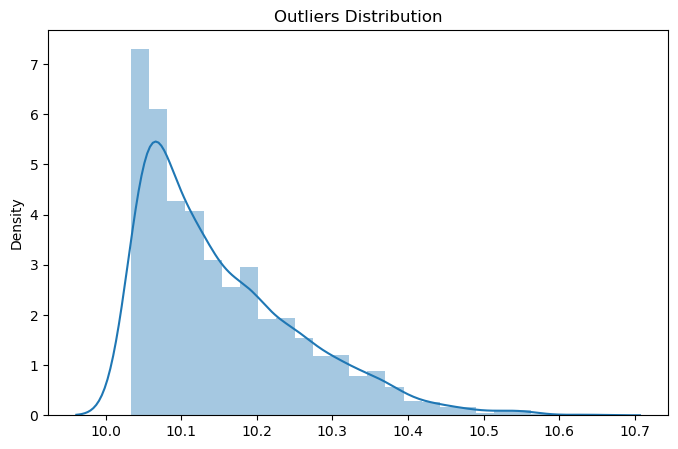

In [123]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [125]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [127]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


In [129]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

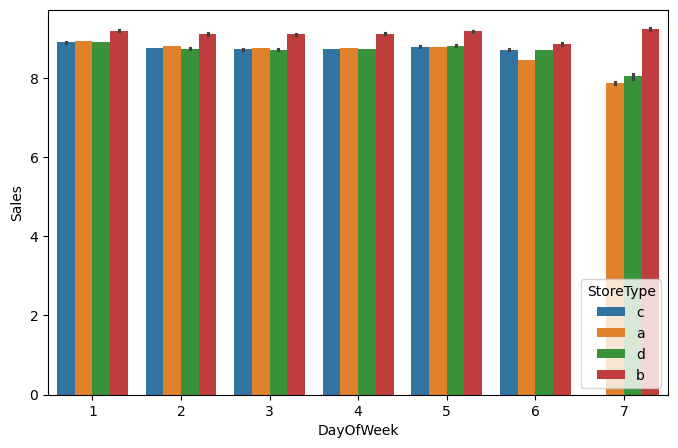

In [133]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [134]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

In [137]:
#shape
df1.shape

(844338, 17)

In [139]:
#just in case something messes up
df2 = df1.copy()

In [141]:
df2.head(1)


,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


In [340]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [342]:
#start date
df2.head(1)

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,
2013-01-01,85,2,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.34759


In [344]:
#end date
df2.tail(1)

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,
2015-07-31,1115,5,1,0,1,d,c,5350.0,1,2015,7,31,212,22.0,38.071233,0,9.068777


In [372]:
df2.columns

Index(['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'Year', 'Month',
       'WeekOfYear', 'DayOfYear', 'CompetitionOpen', 'Promo2Open',
       'Promo2running', 'Sales'],
      dtype='object')

In [400]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [402]:
#csv
df_train1 = df_train.to_csv(r"C:\Users\HP\Desktop\Almabetter\ML capstone\Retail_sales_prediction\df_train.csv")
df_test2 = df_test.to_csv(r"C:\Users\HP\Desktop\Almabetter\ML capstone\Retail_sales_prediction\df_test.csv")

In [403]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 15)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 15)
The shape of y_test is: (45852, 1)


In [380]:
# Categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# Fit encoder
encoder = OneHotEncoder(sparse_output=False)  # Updated argument name

# Train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))  # Updated method name
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoded_features, index=X_train.index)

# Append the encoded features to the training data
X_train = X_train.drop(categorical_cols, axis=1).join(X_train_encoded)

# Test
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

# Append the encoded features to the test data
X_test = X_test.drop(categorical_cols, axis=1).join(X_test_encoded)

print(X_train)
print(X_test)

                  Promo  StateHoliday  SchoolHoliday  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85         0             1              1               1870.0   
           259        0             1              1                210.0   
           262        0             1              1               1180.0   
           274        0             1              1               3640.0   
           335        0             1              1                 90.0   
...                 ...           ...            ...                  ...   
2015-06-14 948        0             0              0               1430.0   
           1045       0             0              0              26990.0   
           1081       0             0              0                400.0   
           1097       0             0              0                720.0   
           1099       0             0              0                200.0   

In [381]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

In [382]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [383]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [384]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [408]:
def model_evaluation(model_name, model_variable, X_train, y_train, X_test, y_test):
    ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
        and creates a dataframe that compares the various models.'''

    # Making predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)

    # Copy y_test to add predictions
    a = y_test.copy()
    a['Pred Sales'] = y_pred_test.tolist()

    # Ensure 'Date' is the index
    if 'Date' not in a.index.names and 'Date' in a.columns:
        a.set_index('Date', inplace=True)
    
    # Grouping by Date and plotting
    plot = a.groupby('Date')[['Sales', 'Pred Sales']].sum()
    sns.lineplot(data=plot)
    plt.ylabel("Total Sales and Predicted Sales")
    plt.xticks(rotation=25)
    plt.show()

    # Calculate metrics and print the results for the test set
    MAE_train = round(mean_absolute_error(y_train, y_pred_train), 6)
    MAE_test = round(mean_absolute_error(y_test, y_pred_test), 6)
    MSE_train = round(mean_squared_error(y_train, y_pred_train), 6)
    MSE_test = round(mean_squared_error(y_test, y_pred_test), 6)
    RMSE_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 6)
    RMSE_test = round(mean_squared_error(y_test, y_pred_test, squared=False), 6)
    R2_train = round(r2_score(y_train, y_pred_train), 6)
    R2_test = round(r2_score(y_test, y_pred_test), 6)
    Adj_r2_train = round(1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1), 6)
    Adj_r2_test = round(1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1), 6)

    # Printing test results
    print(f'The Mean Absolute Error for the validation set is {MAE_test}')
    print(f'The Mean Squared Error for the validation set is {MSE_test}')
    print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
    print(f'The R^2 for the validation set is {R2_test}')
    print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

    # Saving our results
    metric_scores = [model_name, MAE_train, MSE_train, RMSE_train, R2_train, Adj_r2_train, MAE_test, MSE_test, RMSE_test, R2_test, Adj_r2_test]
    final_dict = dict(zip(comparison_columns, metric_scores))
    return [final_dict]


In [412]:
# Check if the columns match
print(X_train.columns.difference(X_test.columns))
print(X_test.columns.difference(X_train.columns))

Index([], dtype='object')
Index([], dtype='object')


In [414]:
# Re-encode categorical features on test set using the same encoder
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

# Align columns
X_test = X_test.drop(categorical_cols, axis=1)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [429]:
# Scaling train and test sets
stdsc = StandardScaler()
X_train_scaled = stdsc.fit_transform(X_train)
X_test_scaled = stdsc.transform(X_test)

# Ensure the transformed data is a DataFrame with the same columns as before
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [418]:
# Check data types
print(X_train.dtypes)

# Identify any problematic columns with object/string types
problematic_columns = X_train.select_dtypes(include=['object']).columns
print(problematic_columns)


DayOfWeek                int64
Promo                    int64
StateHoliday             int64
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
Year                     int32
Month                    int32
WeekOfYear              UInt32
DayOfYear                int32
CompetitionOpen        float64
Promo2Open             float64
Promo2running            int64
dtype: object
Index(['StoreType', 'Assortment'], dtype='object')


In [420]:
for col in problematic_columns:
    print(f"Unique values in {col}: {X_train[col].unique()}")


Unique values in StoreType: ['b' 'a' 'c' 'd']
Unique values in Assortment: ['a' 'b' 'c']


In [422]:
# Check if categorical columns need encoding
for col in problematic_columns:
    if X_train[col].dtype == 'object':
        print(f"Encoding {col}")
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes


Encoding StoreType
Encoding Assortment


In [424]:
# Attempt to convert problematic columns to numeric, coercing errors
for col in problematic_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle any potential NaN values that result from coercion
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [426]:
print(X_train.dtypes)

DayOfWeek                int64
Promo                    int64
StateHoliday             int64
SchoolHoliday            int64
StoreType                 int8
Assortment                int8
CompetitionDistance    float64
Promo2                   int64
Year                     int32
Month                    int32
WeekOfYear              UInt32
DayOfYear                int32
CompetitionOpen        float64
Promo2Open             float64
Promo2running            int64
dtype: object


In [387]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming comparison_columns is defined globally
comparison_columns = ['Model', 'MAE_train', 'MSE_train', 'RMSE_train', 'R2_train', 'Adj_R2_train', 
                      'MAE_test', 'MSE_test', 'RMSE_test', 'R2_test', 'Adj_R2_test']


In [370]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor()

# Fit the model on the training data
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor()

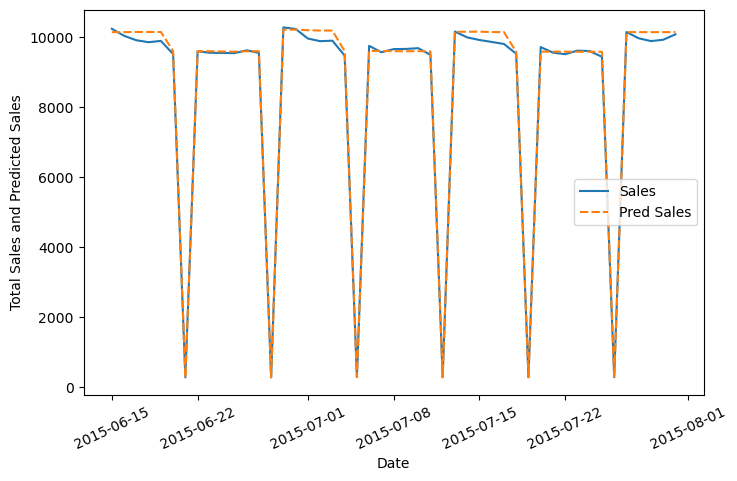

The Mean Absolute Error for the validation set is 0.329715
The Mean Squared Error for the validation set is 0.183527
The Root Mean Squared Error for the validation set is 0.4284
The R^2 for the validation set is -0.074197
The Adjusted R^2 for the validation set is -0.074548
[{'Model': 'Decision Tree Regressor', 'MAE_train': 0.001652, 'MSE_train': 0.000601, 'RMSE_train': 0.024508, 'R2_train': 0.996688, 'Adj_R2_train': 0.996688, 'MAE_test': 0.329715, 'MSE_test': 0.183527, 'RMSE_test': 0.4284, 'R2_test': -0.074197, 'Adj_R2_test': -0.074548}]


In [434]:
# Evaluate the model using the function
decision_tree_results = model_evaluation('Decision Tree Regressor', decision_tree, X_train, y_train, X_test, y_test)

# Print the results
print(decision_tree_results)

In [406]:
print(y_test.index.names)  # This will show the current index levels

['Date', 'Store']


In [315]:
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

In [321]:
df.columns

Index(['Feature1', 'Feature2', 'Target'], dtype='object')

In [438]:
comparison_df

,Model,MAE_train,MSE_train,RMSE_train,R2_train,Adj_R2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_R2_test
0,Decision Tree Regressor,0.0,0.0,0.0,1.0,1.0,5.0,25.0,5.0,NaN,NaN
